In [27]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('G:\Soham_DSML\LR1\canada_per_capita_income.csv')

df.rename(columns={'per capita income (US$)':'PC_Income'}, inplace=True)
df.head(5)

,year,PC_Income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


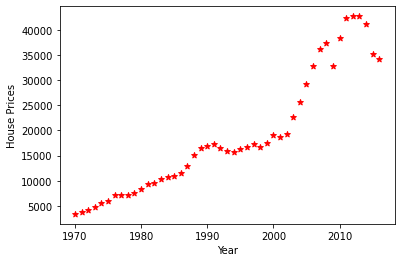

In [29]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('House Prices')
plt.scatter(df.year, df.PC_Income,color='red',marker='*')

In [30]:
new_df = df.drop('PC_Income', axis='columns')
new_df.head(5)

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [31]:
PC_Income = df.PC_Income
PC_Income.head(5)

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: PC_Income, dtype: float64

In [32]:
reg = linear_model.LinearRegression()
reg.fit(new_df,PC_Income)

LinearRegression()

In [33]:
reg.predict([[2020]])

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [34]:
reg.coef_

array([828.46507522])

In [35]:
reg.intercept_

-1632210.7578554575

In [43]:
income_df = pd.read_csv('predictions.csv')
income_df = income_df.drop('Unnamed: 0', axis='columns')
income_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
...,...
144,2114
145,2115
146,2116
147,2117


In [44]:
p=reg.predict(income_df)
p

array([  -134.55966672,    693.9054085 ,   1522.37048373,   2350.83555895,
         3179.30063417,   4007.7657094 ,   4836.23078462,   5664.69585984,
         6493.16093506,   7321.62601029,   8150.09108551,   8978.55616073,
         9807.02123595,  10635.48631118,  11463.9513864 ,  12292.41646162,
        13120.88153685,  13949.34661207,  14777.81168729,  15606.27676251,
        16434.74183774,  17263.20691296,  18091.67198818,  18920.1370634 ,
        19748.60213863,  20577.06721385,  21405.53228907,  22233.9973643 ,
        23062.46243952,  23890.92751474,  24719.39258996,  25547.85766519,
        26376.32274041,  27204.78781563,  28033.25289085,  28861.71796608,
        29690.1830413 ,  30518.64811652,  31347.11319175,  32175.57826697,
        33004.04334219,  33832.50841741,  34660.97349264,  35489.43856786,
        36317.90364308,  37146.3687183 ,  37974.83379353,  38803.29886875,
        39631.76394397,  40460.22901919,  41288.69409442,  42117.15916964,
        42945.62424486,  

In [45]:
income_df['income'] = p
income_df

,year,income
0,1970,-134.559667
1,1971,693.905409
2,1972,1522.370484
3,1973,2350.835559
4,1974,3179.300634
...,...,...
144,2114,119164.411165
145,2115,119992.876241
146,2116,120821.341316
147,2117,121649.806391


In [46]:
income_df.to_csv('predictions.csv')